# kachaka_apiライブラリ

- kachaka_apiライブラリは、gRPCでの通信を意識することなくカチャカのAPIを使うことができるようにしたものです。

## 同期ライブラリについて
- このサンプルでは、kachaka_api.KachakaApiClientクラスを用いて、カチャカのAPIをメソッド呼びだしの形で実行していきます。
- 非同期のライブラリも用意されています。詳細は、[非同期ライブラリ篇](./kachaka_api_client_async.ipynb)を参照してください。

#### 依存ライブラリのインストール
- デフォルトではmatploblib, numpyはインストールされていません。必要に応じてインストールします。
- pip installの実行後は、JupyterLabのカーネルをリスタートしてください

In [57]:
from IPython.display import Image, display

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display


Bad key axes3d.automargin in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 436 ('axes3d.automargin: False  # automatically add margin when manually setting 3D axis limits')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key axes3d.mouserotationstyle in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 442 ('axes3d.mouserotationstyle: arcball  # {azel, trackball, sphere, arcball}')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key axes3d.trackballsize in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 444 ('axes3d.trackballsize: 0.667  # trackball diameter, in units of the Ax


Bad key axes3d.trackballborder in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 445 ("axes3d.trackballborder: 0.2  # trackball border width, in units of the Axes bbox (only for 'sphere' and 'arcball' style)")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key image.interpolation_stage in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 617 ('image.interpolation_stage: auto     # see help(imshow) for options')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key svg.id in file c:\Users\ayaka\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, line 749 ('svg.id: None            # If not None, use this strin

AttributeError: '_ArtistPropertiesSubstitution' object has no attribute 'register'

## インポートとクライアントの作成
- クライアントを作成します。1度だけでOKです。
- 引数に`<カチャカのIPアドレス:26400>`を指定することで、本ライブラリを外部のPC等で利用することが可能です

In [7]:
import kachaka_api

client = kachaka_api.KachakaApiClient("192.168.11.8:26400")

## 各APIの実行

- 以下では、各APIを実行するサンプルを提供します。

### ロボットの個体情報の取得

#### ロボットのシリアル番号の取得

In [60]:
client.get_robot_serial_number()

'BKP403F1T'

#### カチャカのソフトウェアバージョン情報の取得

In [8]:
client.get_robot_version()

'3.10.7'

### 目的地・家具の情報の取得

#### 目的地の情報一覧を取得
- idは後述の関数で目的地を指定する際に使用します
- poseの単位はロボットの姿勢同様にmおよびradianです

In [19]:
client.get_locations()

[id: "L01"
name: "お風呂"
pose {
  x: 2.254298
  y: -1.289411
  theta: -1.5707959999999999
}
, id: "S01_home"
name: "ワゴンのホーム"
pose {
  x: 0.98158777978855072
  y: 0.69441168833372113
  theta: -1.4715056494650316
}
type: LOCATION_TYPE_SHELF_HOME
undock_shelf_aligning_to_wall: true
, id: "home"
name: "充電ドック"
pose {
  x: -0.009711
  y: 0.021707
  theta: -0.0010923071795867719
}
type: LOCATION_TYPE_CHARGER
]

#### デフォルト目的地のID取得
- デフォルト目的地は、「〇〇を持ってきて」と目的地が省略された場合に使用されます

In [13]:
client.get_default_location_id()

'L01'

#### 家具情報一覧の取得
- idは後述の関数で家具を指定する際に使用します
- poseの単位はロボットの姿勢同様にmおよびradianです

In [61]:
client.get_shelves()

[id: "S01"
name: "ワゴン"
pose {
  x: 0.93604974248008221
  y: 0.66851829856707734
  theta: -1.5048362369893338
}
size {
  width: 0.37
  depth: 0.32
  height: 1.5
}
appearance: SHELF_APPEARANCE_KACHAKA_BASE
recognizable_names {
  name: "ワゴン"
}
home_location_id: "S01_home"
speed_mode: SHELF_SPEED_MODE_NORMAL
]

#### ドッキング中の家具のIDの取得
- idは上で取得できる一覧の中のいずれか、あるいはドッキングしていないときは空文字列を返します。

In [62]:
client.get_moving_shelf_id()

''

### コマンドの実行

#### 家具の移動
- 家具ID, 目的地IDを指定すると、指定した家具を目的地へ運びます。
- IDの一覧は、それぞれ前述のget_shelves(), get_locations()で取得できます。

In [14]:
client.move_shelf("S01", "L01")

Failed to get shelf id of S01
Failed to get location id of L01


success: true

#### 家具および目的を名前で指定する
* kachaka_apiライブラリでは家具、目的地の名前を指定してすることもできます。
* 下記のように`update_resolver`を呼び出すことで名前テーブルを更新します。
* 家具や目的地の増減があった場合は`update_resolver`を再度呼び出して反映する必要があります。

In [ ]:
client.update_resolver()
client.move_shelf("シェルフ", "ダイニング")

#### 家具の片付け
- 指定した家具を片付けます。

In [17]:
client.return_shelf("S01")

Failed to get shelf id of S01


success: true

- 引数を省略すると、いま載せている家具を片付けます。

In [ ]:
client.return_shelf()

#### 家具を置く
- 載せている家具をその場に置きます。

In [15]:
client.undock_shelf()

success: true

#### 目的地への移動

In [ ]:
client.move_to_location("L01")

#### 充電ドックに行く

In [79]:
client.return_home()

success: true

#### 家具を載せる
- カチャカの前にある家具を載せます

In [48]:
client.dock_shelf()

KeyboardInterrupt: 

#### 家具に拘らず、指定した目的地にある家具を載せる
- 指定した目的地に行き、どの家具があるかにかかわらず置いてある家具を載せます。
- 未登録の家具の場合、新しい家具として登録します。
- 第1引数には目的地のIDを、第2引数にはドッキングの向き (頭から: True, おしりから: False) を指定します。

In [ ]:
client.dock_any_shelf_with_registration("L01", False)

#### 音声の発話

In [ ]:
client.speak("こんにちは、カチャカです")

#### マップ上での座標を指定した移動

In [63]:
client.move_to_pose(0.5, 0.0, 0)

success: true

#### 前後方向の移動
* メートルで距離を指定すると、その距離だけ前進します。(負の値が後退を表します)
* (任意) speedに速度[m/s]を指定できます。(正確には、これを最高速度としてフィードバック制御を行います) 

In [47]:
client.move_forward(0, speed=1.0)
client.move_forward(-0.9, speed=1.0)

success: true

#### その場での回転
* ラジアンで角度を指定すると、半時計回り(z軸周りに右ねじの向き)にその場回転します。

In [78]:
import math

client.rotate_in_place(math.pi/2)

success: true

#### 自己位置の修正
* カチャカのマップ上の位置と実際の位置がずれている場合は、カチャカが回転し、周りの環境を見て位置ずれの修正を試します。
* 修正が失敗した場合はカチャカの位置は修正されません。

In [ ]:
client.localize()

### コマンドの実行状態と管理

#### 実行中のコマンドのキャンセル

In [ ]:
client.cancel_command()

#### 実行中のコマンドの状態の取得
- コマンドが実行中かどうか調べる

In [ ]:
client.is_command_running()

- 実行中のコマンドを取得する

In [ ]:
client.get_running_command()

#### 最後に実行されたコマンドの結果の取得

In [ ]:
client.get_last_command_result()

#### コマンド実行履歴の取得

In [ ]:
client.get_history_list()

#### 待機状態とその解除

lock()を実行すると、カチャカを何もしない状態のままその場に留まらせることができます。
pythonのプログラムでsleepするのと違って、カチャカは「待機」というコマンドを実行している状態になります。後に続いてcancel_all=Falseでコマンドを実行すると、待機状態が解除されてから次のコマンドに進みます。

In [ ]:
client.lock(30.0)
client.speak("待機状態が解除されました", cancel_all=False)

時間が経過するか、proceed()の実行により、待機状態が終了します。

In [ ]:
client.proceed()

### ショートカット
スマホアプリのショートカットの一覧の取得や実行ができます。

#### 一覧の取得
IDとショートカット名の対がdictとして取得できます。

In [ ]:
client.get_shortcuts()

#### ショートカットの実行

In [ ]:
shortcut_id = min((client.get_shortcuts()).keys())
client.start_shortcut_command(shortcut_id, True)

#### 家具の位置をリセットする
* カチャカがドッキングしていない人が手で家具の位置を動かしたりすると、カチャカの認識と実際の場所がずれることがあります。
* 家具をホームに戻し、このメソッドを呼ぶことで認識を合わせることができます。

In [ ]:
client.reset_shelf_pose("S01")

#### 自動充電のオン・オフを切り替える
- 一定時間速度指令を受け付けないとカチャカは自動で充電ステーションに戻ります。これを自動充電と呼びます

In [ ]:
client.set_auto_homing_enabled(True)

### 音量設定
音量を0-10で設定することができます。

#### 現在の音量の取得

In [ ]:
client.get_speaker_volume()

#### 音量の設定

In [ ]:
client.set_speaker_volume(10)

### 速度指令

#### 手動操作モードへの変更
- 速度を指令してカチャカを動かす場合は手動操縦モードに変更する必要があります。
- 60秒経つと自動でオフになるため、必要に応じて定期的に有効にする必要があります。
- 充電ドック上にいる場合は前に進んで充電ドックから出ます

In [ ]:
client.set_manual_control_enabled(True)

#### 手動操縦モードの確認

In [ ]:
client.get_manual_control_enabled()

#### 速度指令
- 指令した値は次の指令値が来るまで、もしくは0.3秒間経つまで保持されます
- 単位はm/s、rad/sです

In [ ]:
for i in range(100):
    client.set_robot_velocity(0.0, 0.3)

### 各種センサデータ等の取得

#### 充電状態・充電残量の取得
* (充電残量(%), 充電の状態) を返します。
* 充電の状態は以下のいずれかです。protoには他の値も定義されていますが、使われていません。
  * 充電中: `PowerSupplyStatus.POWER_SUPPLY_STATUS_CHARGING` (=1)
  * 放電中: `PowerSupplyStatus.POWER_SUPPLY_STATUS_DISCHARGING` (=2)

In [42]:
client.get_battery_info()

(94.84781646728516, 1)

#### マップ上の姿勢の取得
- 単位はm, radianです

In [43]:
client.get_robot_pose()

x: -0.003777877059064183
y: -0.0040310498751262025
theta: 0.016048882008762855

#### マップ情報の取得
- マップ画像とマップ座標との対応関係については、[plot_map_robot_lidar.ipynb](../python/demos/plot_map_robot_lidar.ipynb) を参照

In [ ]:
map = client.get_png_map()
print(map.name)
print(map.resolution, map.width, map.height)
print(map.origin)
display(Image(data=map.data))

#### LiDARの点群情報の取得
- LiDARは充電ドック上にいる間は停止しており、データが更新されません


In [88]:
scan = client.get_ros_laser_scan()

theta = np.linspace(scan.angle_min, scan.angle_max, len(scan.ranges))
dist = np.array(scan.ranges)

# LiDARの点群を表示するサンプル
plt.scatter(dist * np.cos(theta), dist * np.sin(theta))

NameError: name 'plt' is not defined

#### IMU情報の取得

In [41]:
client.get_ros_imu()

header {
  stamp_nsec: 1747102088050981127
  frame_id: "imu_link"
}
orientation {
}
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
orientation_covariance: 0
angular_velocity {
}
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
angular_velocity_covariance: 0
linear_acceleration {
  x: -0.055068318735312961
  y: -0.27175018158513137
  z: 10.030813971373638
}
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_acceleration_covariance: 0
linear_ac

#### オドメトリの取得

In [65]:
client.get_ros_odometry()

header {
  stamp_nsec: 1747103900736750126
  frame_id: "odom"
}
child_frame_id: "base_footprint"
pose {
  pose {
    position {
      x: 0.072594571022672236
      y: 0.0050687542335542436
    }
    orientation {
      z: -0.07367727815476921
      w: 0.99728213594935344
    }
  }
  covariance: 638127849091175.25
  covariance: -144914406381737
  covariance: 0
  covariance: 0
  covariance: 0
  covariance: 3.23054314556531e-22
  covariance: -144914406381733.59
  covariance: 33050741651041.465
  covariance: 0
  covariance: 0
  covariance: 0
  covariance: 2.1847734489021296e-21
  covariance: 0
  covariance: 0
  covariance: 4.9916348865335657e-07
  covariance: 1.2790492051008854e-21
  covariance: -1.8289659260983045e-18
  covariance: 0
  covariance: 0
  covariance: 0
  covariance: 1.2790492051008856e-21
  covariance: 4.9833254260443143e-07
  covariance: 3.19724679838364e-30
  covariance: 0
  covariance: 0
  covariance: 0
  covariance: -1.8289659260983041e-18
  covariance: 2.2042514584328064

### カメラ関連

#### カメラ情報の取得

In [71]:
client.get_front_camera_ros_camera_info()

header {
  stamp_nsec: 1747103974817850009
  frame_id: "camera_front"
}
height: 720
width: 1280
distortion_model: "plumb_bob"
D: -0.27289859035437636
D: 0.099431979574457471
D: -0.00068297275581652613
D: -1.6916276799448249e-05
D: -0.019507292609844646
K: 503.56142055797034
K: 0
K: 641.66621967314109
K: 0
K: 497.84906863249745
K: 337.01300011641081
K: 0
K: 0
K: 1
R: 1
R: 0
R: 0
R: 0
R: 1
R: 0
R: 0
R: 0
R: 1
P: 503.56142055797034
P: 0
P: 641.66621967314109
P: 0
P: 0
P: 497.84906863249745
P: 337.01300011641081
P: 0
P: 0
P: 0
P: 1
P: 0
roi {
}

#### フロントカメラ画像の取得

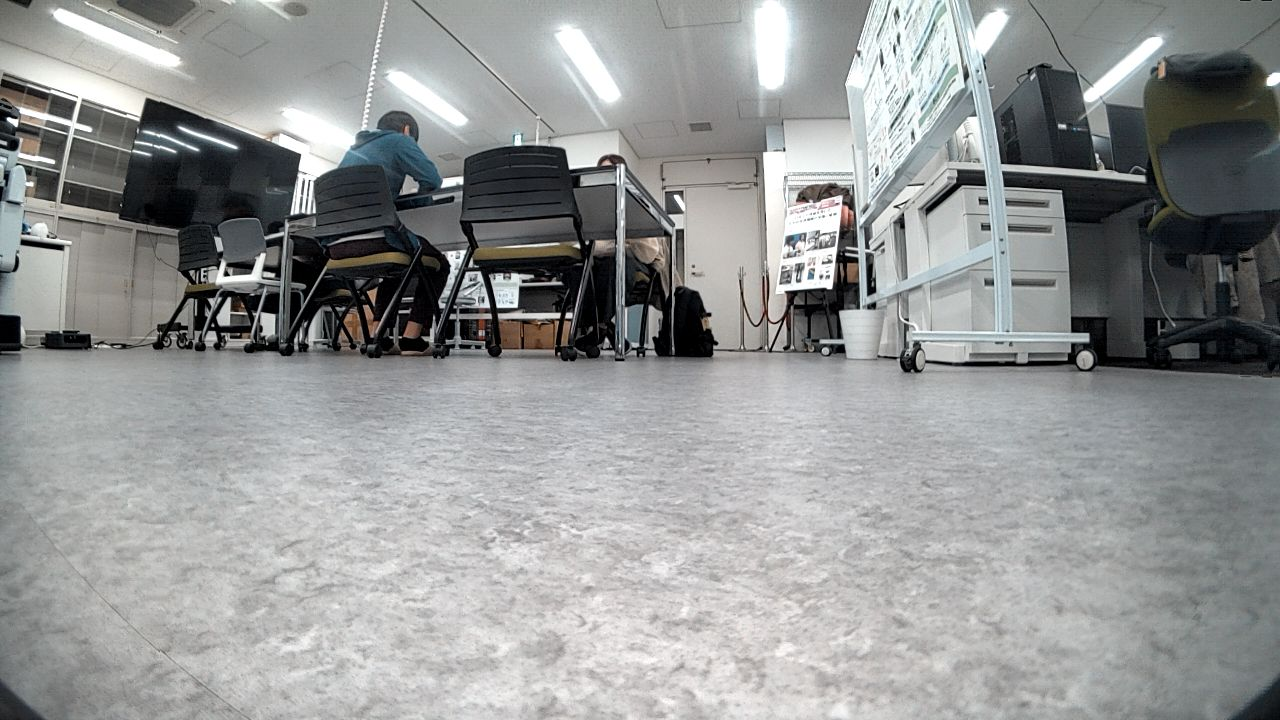

In [77]:
image = client.get_front_camera_ros_compressed_image()
display(Image(data=image.data, format="jpeg"))

- また、劣化の無いデータが必要な場合は`get_front_camera_ros_image`で取得する事が可能です。  
- ただし、データ量が増加するため注意が必要です。


#### 物体検出結果の取得
- カメラで見えている物体(充電器, 家具, 人)の情報を取得します。
- カメラを起動してから呼び出す必要があります。
- 画像中への描画は[物体検出のサンプル](../python/demos/get_object_detection.ipynb)参照

In [ ]:
client.get_object_detection()

### マップのインポート・エスクポート

#### マップ一覧の取得

In [ ]:
map_list = client.get_map_list()
for map_list_entry in map_list:
    print("id:", map_list_entry.id)
    print("name:", map_list_entry.name)

#### 現在使用中のマップIDの取得

In [ ]:
current_map_id = client.get_current_map_id()
current_map_id

#### マップのプレビューの取得
* 上で取得したマップ一覧の中から、IDを指定してそのプレビュー(PNG形式のマップ画像)を取得することができます。
* ここでは、現在使用中のマップIDを指定する例を示します。(現在使用中のマップの場合はclient.get_png_map()で取得することもできます)

In [ ]:
current_map_preview = client.load_map_preview(current_map_id)
display(Image(data=current_map_preview.data, format="png"))

#### マップのエクスポート
* マップをエクスポートすることで、バックアップを取ったり他のカチャカ機体で再利用することができます。
* 上で取得したマップの一覧から、IDを指定してエクスポートすることができます。
* 第2引数に指定したパスにバイナリファイルとして保存します。
* データは独自形式のバイナリになっています。インポートAPIでのみ利用することができるデータです。

In [ ]:
EXPORT_TARGET_FILE_PATH = "current_map"
client.export_map(current_map_id, "current_map")

#### マップのインポート
* 上のエクスポートAPIによって出力されたファイルを別の機体などでインポートすることができます。

In [ ]:
client.import_map(EXPORT_TARGET_FILE_PATH)

### 起動状態の管理

#### カチャカを再起動する
実行してから再起動が始まり、LEDがくるくると回転しはじめるまで数秒かかることがあります。

In [ ]:
client.restart_robot()

### 一時停止

#### ソフト的に一時停止ボタンを押した状態にする

In [ ]:
client.set_emergency_stop()